# Problema: Masa Resorte Amortiguador

In [ ]:
# Librerias utiles
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import imageio.v2 as imageio
from google.colab import drive
from google.colab import files
from os import TMP_MAX

# Modelo Físico

## Variables y parámetros útiles

In [ ]:
# Parámetros físicos
l0 = 0.25 # m
g = 9.81  # m/s^2
m = 1     # kg
b = 0.5     # Ns/m
k = 2    # N/m
tiempo_total = 20 # s
delta_T = 0.01 # s

# Calculo de parámetros útiles
omega = np.sqrt(k/m)
seda  = b/(2*np.sqrt(m*k))
phi = np.arctan(-seda)
# Definir el vector de tiempo
t = np.arange(0, tiempo_total, delta_T)

print(f"omega = {omega}")
print(f"seda = {seda}")
print(f"phi = {phi}")

omega = 1.4142135623730951
seda = 0.17677669529663687
phi = -0.17496904566568885


## Función desplazamiento

In [ ]:
# Calcular desplazamiento y posición
def desplazamiento(tiempo):
  despl = (g / omega**2) * (1 - np.exp(-seda * omega * tiempo)* np.cos(omega * tiempo + phi)/np.cos(phi))
  return despl

u = desplazamiento(t)
x = u + l0

## Gráficas

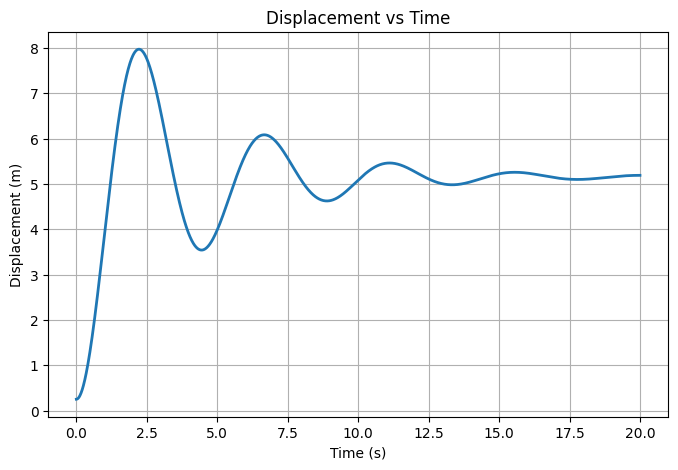

In [ ]:
# Graficar
plt.figure(figsize=(8, 5))
plt.plot(t, x, linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.grid(True)
plt.title('Displacement vs Time')
plt.show()

# Modelo predictivo data

## Parámetros

In [ ]:
# Crear datos de entrada para la red neuronal
# X es un vector de n valores seleccionados entre 0 y 10
n = 25 # Numero de muestras
t_datos =
t_max = t_datos # Tiempo maximo
t_min = 0 # Tiempo minimo
X_i = np.array([[0.0]])
b_init = np.array([[0.0]])
# Parametros de la Red Neuronal
epochs_FFNN =
learning_rate =
nneurons =
nhiden_layers =
activation_fn = nn.Tanh()
make_video = False

## Preparación de datos

In [ ]:
X = np.arange(t_min, t_max, (t_max-t_min)/n)
y = desplazamiento(X)
X_collocation = np.arange(0.0, tiempo_total, tiempo_total/100)

# Convertir a tensores de PyTorch
X_train = torch.tensor(X, dtype=torch.float32).reshape(-1, 1)
X_test  = torch.tensor(t, dtype=torch.float32).reshape(-1, 1)
y_train = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)
y_test  = torch.tensor(u, dtype=torch.float32).reshape(-1, 1)
X_train_phy = torch.tensor(X_collocation, dtype=torch.float32).reshape(-1, 1)
X_init = torch.tensor(X_i, dtype=torch.float32).reshape(-1, 1)

# Arquitectura de la red
input_dim = X_train.shape[1]
output_dim = y_train.shape[1]
layers = np.array([input_dim] + [ nneurons for i in range(nhiden_layers)] + [output_dim])

# Feed-Forward Neural Network (FFNN)

## Clase Deep Neural Network 🧠

In [ ]:
class DNN(nn.Module):

  # Inicialización de la RED
  def __init__(self, layers):
    super(DNN, self).__init__() # Llama __init__ de la clase padre

    # Funcion de activacion
    self.activation_fn = activation_fn

    # Historial de loss
    self.loss_history = []

    # Definir capas (crea una lista de capas Fully connected)
    self.layers = nn.ModuleList([nn.Linear(layers[i], layers[i+1]) for i in range(len(layers)-1)])

    # Inicializacion de pesos Xavier Glorot y bias como ceros
    for i in range(len(layers)-1):
      # Pesos
      nn.init.xavier_normal_(self.layers[i].weight.data, gain=1.0)
      # Bias
      nn.init.zeros_(self.layers[i].bias.data)

  # Propagación hacia adelante
  def forward(self, x):
    for i in range(len(layers)-2):
      x = self.activation_fn(self.layers[i](x))

    x = self.layers[-1](x)
    return x

## Intanciar el modelo ⛏

In [ ]:
# Instanciar modelo, definir función de pérdida y optimizador
model_ffnn = DNN(layers)
loss_fn = nn.MSELoss(reduction = "mean")
optimizer = optim.Adam(model_ffnn.parameters(), lr=learning_rate)

## Entrenar 🦾

In [ ]:
# Entrenar el modelo

frames = [] # Lista para guardar imágenes

for epoch in range(epochs_FFNN):
  # Forward
  y_pred = model_ffnn(...) # Que data debe entrenarse
  loss = loss_fn(..., ...) # Que debemos minimizar
  model_ffnn.loss_history.append(loss.item())

  # Backward
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if (epoch) % 10 == 0:
    print(f'Epoch [{epoch}/{epochs_FFNN}], Loss: {loss.item():.6f}')

    if make_video:
      # Haciendo plots para video
      y_pred = model_ffnn(X_test).detach().numpy()
      plt.figure(figsize=(8, 5))
      plt.plot(X_test[:, 0].numpy(), y_test.numpy(), label='Real', linewidth=1.5)
      plt.plot(X_test[:, 0].numpy(), y_pred, label='Predicho', linewidth=1.5, linestyle='dashed')
      # plot los puntos de evaluacion con X
      plt.scatter(X[:, 0], y, color='red', label='Puntos de evaluación', marker= 'x')
      plt.xlabel('Time (seda)')
      plt.ylabel('Displacement (m)')
      plt.legend()
      plt.title(f"Epoch {epoch}")
      plt.savefig(f"frame_{epoch}.png")
      plt.close()
      frames.append(imageio.imread(f"frame_{epoch}.png"))

if make_video:
  # Guardar el GIF
  gif_path = "/content/training_animation.gif"
  imageio.mimsave(gif_path, frames, duration=0.5)
  files.download(gif_path)

Epoch [0/10000], Loss: 21.753887
Epoch [10/10000], Loss: 14.747109
Epoch [20/10000], Loss: 9.694637
Epoch [30/10000], Loss: 6.346392
Epoch [40/10000], Loss: 4.321501
Epoch [50/10000], Loss: 3.252067
Epoch [60/10000], Loss: 2.781381
Epoch [70/10000], Loss: 2.607451
Epoch [80/10000], Loss: 2.538277
Epoch [90/10000], Loss: 2.492008
Epoch [100/10000], Loss: 2.450486
Epoch [110/10000], Loss: 2.413991
Epoch [120/10000], Loss: 2.382103
Epoch [130/10000], Loss: 2.352683
Epoch [140/10000], Loss: 2.324191
Epoch [150/10000], Loss: 2.295966
Epoch [160/10000], Loss: 2.267638
Epoch [170/10000], Loss: 2.238860
Epoch [180/10000], Loss: 2.209305
Epoch [190/10000], Loss: 2.178681
Epoch [200/10000], Loss: 2.146738
Epoch [210/10000], Loss: 2.113301
Epoch [220/10000], Loss: 2.078329
Epoch [230/10000], Loss: 2.041949
Epoch [240/10000], Loss: 2.004452
Epoch [250/10000], Loss: 1.966228
Epoch [260/10000], Loss: 1.927662
Epoch [270/10000], Loss: 1.889061
Epoch [280/10000], Loss: 1.850612
Epoch [290/10000], Loss

## Evaluar resultados 📈

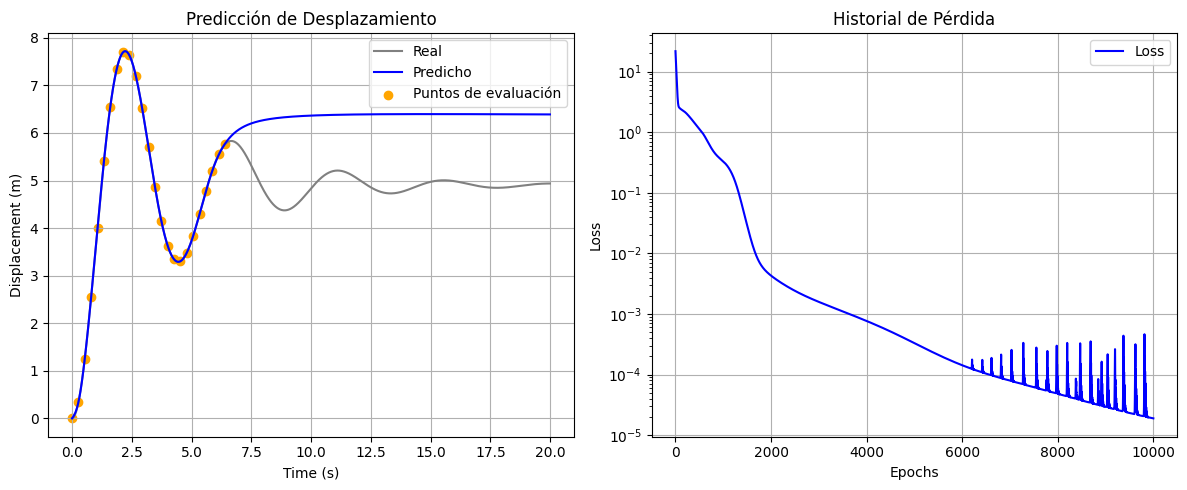

In [ ]:
# Hacer predicciones
model_ffnn.eval()
y_pred = model_ffnn(X_test).detach().numpy()

# Crear una figura con 2 subgráficos (1 fila, 2 columnas)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# --- Gráfico 1: Predicción vs Real ---
axs[0].plot(X_test[:, 0].numpy(), y_test.numpy(), label='Real', linewidth=1.5, color = 'grey')
axs[0].plot(X_test[:, 0].numpy(), y_pred, label='Predicho', linewidth=1.5, color = 'blue')
axs[0].scatter(X_train[:, 0], y_train, color='orange', label='Puntos de evaluación', marker='o')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Displacement (m)')
axs[0].grid(True)
axs[0].set_title('Predicción de Desplazamiento')
axs[0].legend()

# --- Gráfico 2: Historial de pérdida ---
axs[1].semilogy(model_ffnn.loss_history, label='Loss', color='blue', linewidth=1.5)
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].grid(True)
axs[1].set_title('Historial de Pérdida')
axs[1].legend()

# Ajustar diseño para evitar superposiciones
plt.tight_layout()

# Mostrar los gráficos
plt.show()